<img src="https://www.iscte-iul.pt/assets/images/logo_iscte_detailed.svg" style="width: 450px;margin-top:30px;" align ="center">

<div style= "font-size: 40px;  margin-top:40px; font-weight:bold; font-family: 'Avenir Next LT Pro', sans-serif;"><center>Challenge 1 - Part 2: <strong>Binary Classification model</strong></center></div>
<div style= "font-size: 40px; font-weight:bold; font-family: 'Avenir Next LT Pro', sans-serif;"><center>for FASHION_MNIST dataset using neural networks</center></div>

<div style= "font-size: 27px;font-weight:bold;line-height: 1.1; margin-top:40px; font-family: 'Avenir Next LT Pro', sans-serif;"><center>Aprendizagem Profunda para Visão por Computador 2024/2025</center></div> <br>

   <div style= "font-size: 20px;font-weight:bold; font-family: 'Avenir Next LT Pro', sans-serif;"><center> Grupo 7:</center></div>
   <div><center> Diogo Freitas | 104841 </center></div>
   <div><center> João Francisco Botas | 104782 </center></div>
   <div><center> Miguel Gonçalves | 105944 </center></div>
   <div><center> Ricardo Galvão | 105285 </center></div>

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <style>
        body {
            font-family: Arial, sans-serif;
            background-color: #f4f4f4;
            color: #333;
            margin: 0;
            padding: 20px;
            line-height: 1.6;
        }
        ol {
            counter-reset: section;
            list-style: none;
            padding-left: 0;
        }
        /* First-level list */
        ol > li {
            counter-increment: section;
            margin-bottom: 10px;
            padding-left: 0;
        }
        ol > li::before {
            content: counters(section, ".") " ";
            font-weight: bold;
        }
        /* Second-level list */
        ol ol {
            counter-reset: subsection;
            padding-left: 20px;
            margin-top: 5px;
        }
        ol ol > li {
            counter-increment: subsection;
            margin-bottom: 5px;
            padding-left: 10px;
        }
        ol ol > li::before {
            content: counters(section, ".") "." counter(subsection) " ";
            font-weight: bold;
        }
        /* Third-level list */
        ol ol ol {
            counter-reset: subsubsection;
            padding-left: 40px;
            margin-top: 5px;
        }
        ol ol ol > li {
            counter-increment: subsubsection;
            margin-bottom: 5px;
            padding-left: 10px;
            font-size: 0.9em; /* Make font size smaller */
            font-weight: normal; /* Remove bold styling */
        }
        ol ol ol > li::before {
            content: counters(section, ".") "." counter(subsection) "." counter(subsubsection) " ";
            font-weight: bold;
        }
        a {
            text-decoration: none;
            color: #007BFF;
            font-weight: bold;
        }
        a:hover {
            color: #0056b3;
        }
        footer {
            margin-top: 50px;
        }
    </style>
</head>
<body>

<h2><b>Índice</b></h2>
<ol>
    <li><a href="#1">Objetivo desta parte</a></li>
    <li><a href="#2">Setup para desenvolvimento do projeto</a></li>
    <li><a href="#3">Classificação binária</a></li>
        <ol>
            <li><a href="#3.1">Obter um conjunto de validação</a></li>
            <li><a href="#3.2">Construir o modelo</a></li>
            <li><a href="#3.3">Compilar a rede</a></li>
            <li><a href="#3.4">Treinar o modelo – max 50 épocas, de pref. a usar callbacks</a></li>
            <li><a href="#3.5">Gráfico que mostre a evolução do treino</a></li>
            <li><a href="#3.6">Cálculo dos acertos no conjunto de teste</a></li>
            <li><a href="#3.7">Mostrar a matriz de confusão</a></li>
        </ol>
    
</ol>

<footer></footer>

</body>
</html>

# <a class='anchor' id='1'></a>

> # **1. Objetivo desta parte** 

Transformar o problema multi-classe de 10 classes num problema de classificação binário. Para isso serão realizados algumas alterações que na secção <a href="#2">Setup para desenvolvimento do projeto</a>

- Mapear cada uma das 10 classes para um grupo específico: Vestuário ou Calçado/Malas;
- Alterar parâmetros do modelo: binary_crossentropy.

```python
'''
| CLASSE_10 | PEÇA         || NOVA_CLASSE
| 0         | T-shirt/top  || 1
| 1         | Trouser      || 1
| 2         | Pullover     || 1
| 3         | Dress        || 1
| 4         | Coat         || 1
| 5         | Sandal       || 0
| 6         | Shirt        || 1
| 7         | Sneaker      || 0
| 8         | Bag          || 0
| 9         | Ankle boot   || 0

Labels:
1- Vestuário
0- Calçado/Malas
'''

BINARY_MAP = {
    0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 6: 1,  # Vestuário -> 1
    5: 0, 7: 0, 8: 0, 9: 0   # Calçado/Malas -> 0
}
y_train = np.vectorize(BINARY_MAP.get)(y_train)
y_test = np.vectorize(BINARY_MAP.get)(y_test)

y_train = keras.utils.to_categorical(y_train,N_CLASSES)
y_test = keras.utils.to_categorical(y_test,N_CLASSES)

# <a class='anchor' id='2'></a>

> # **2. Setup para desenvolvimento do projeto**

In [1]:
import tensorflow as tf
import keras
from keras import layers

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

import seaborn as sns
import sys
import os
sys.path.append(os.path.abspath('../src'))

In [2]:
# Configurar a seed do TensorFlow
tf.random.set_seed(42)

# Configurar a seed do NumPy
np.random.seed(42)

# Configurar a seed do Keras (caso precise especificar a nível do Keras)
keras.backend.clear_session()

# Definir o número de threads
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # Para evitar log excessivo de TensorFlow
os.environ['OMP_NUM_THREADS'] = '1'  # Para limitar o número de threads

# Definir a seed global para a operação de GPU
tf.config.experimental.enable_op_determinism()

IMG_HEIGHT: 28
IMG_WIDTH: 28
N_CLASSES: 2

Número de amostras no training set original: 60000
Número de amostras no test set original: 10000
Não esquecer que se pretende também gerar um validation set!


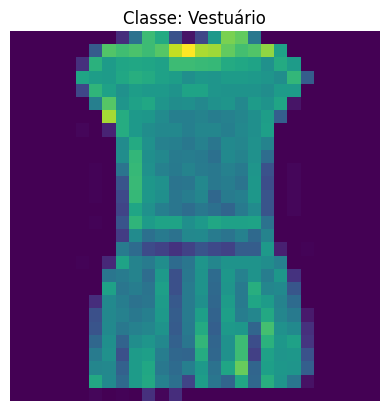

In [3]:
# constantes - dimensão das imagens
IMG_HEIGHT = 28
IMG_WIDTH = 28

# constantes - labels/classes
LABELS = ["Vestuário",
          "Calçado/Malas"]
N_CLASSES = 2

print("IMG_HEIGHT: " + str(IMG_HEIGHT))
print("IMG_WIDTH: " + str(IMG_WIDTH))
print("N_CLASSES: " + str(N_CLASSES) + "\n")

# callbacks
BEST_MODEL_CHECKPOINT = keras.callbacks.ModelCheckpoint(
    filepath="tmp/best_model.weights.h5",      # ficheiro para os pesos do "melhor modelo"
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

EARLY_STOPPING = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5)

# carregar o dataset FASHION_MNIST
dataset = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = dataset.load_data()

# normalização
x_train = x_train / 255.0
x_test = x_test / 255.0

print("Número de amostras no training set original: " + str(x_train.shape[0]))
print("Número de amostras no test set original: " + str(x_test.shape[0]))
print("Não esquecer que se pretende também gerar um validation set!")

BINARY_MAP = {
    0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 6: 1,  # Vestuário -> 1
    5: 0, 7: 0, 8: 0, 9: 0   # Calçado/Malas -> 0
}

y_train = np.vectorize(BINARY_MAP.get)(y_train)
y_test = np.vectorize(BINARY_MAP.get)(y_test)

y_train = keras.utils.to_categorical(y_train,N_CLASSES)
y_test = keras.utils.to_categorical(y_test,N_CLASSES)

# Visualizar a primeira imagem do conjunto de treino
plt.imshow(x_train[3])
plt.title(f'Classe: {LABELS[np.argmax(y_train[0])]}')
plt.axis('off')  # Esconder os eixos
plt.show()

# <a class='anchor' id='3'></a>

> # **3. Classificação binária**

# <a class='anchor' id='3.1'></a>

> ## **a) Obter um conjunto de validação**

In [4]:
# Criar conjunto de validação (17% dos dados de treino)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.17, random_state=42)

print("Número de amostras no training set:", x_train.shape[0])
print("Número de amostras no validation set:", x_val.shape[0])
print("Número de amostras no test set:", x_test.shape[0])

Número de amostras no training set: 49800
Número de amostras no validation set: 10200
Número de amostras no test set: 10000


# <a class='anchor' id='3.2'></a>

> ## **b) Construir o modelo**

In [5]:
# Criar o modelo
modelo = keras.Sequential([
    layers.Flatten(input_shape=(IMG_HEIGHT, IMG_WIDTH)),  # Transformar imagem 28x28 num vetor 1D
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(N_CLASSES, activation='softmax')  # Camada de saída com as 10 classes da label
])

C:\Users\Avey\miniforge3\envs\apvc\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# <a class='anchor' id='3.3'></a>

> ## **c) Compilar a rede**

In [6]:
# Compilar o modelo
modelo.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

# <a class='anchor' id='3.4'></a>

> ## **d) Treinar o modelo – max 50 épocas, de pref. a usar callbacks**


Serão utilizadas as callbacks seguintes (estas estão definidas no ficheiro `fashionNetPart2.py`):

```python
BEST_MODEL_CHECKPOINT = keras.callbacks.ModelCheckpoint(
    filepath="tmp/best_model.weights.h5",      # ficheiro para os pesos do "melhor modelo"
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

EARLY_STOPPING = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5)

In [7]:
# Treinar o modelo (máx. 50 épocas, usando callbacks)
history = modelo.fit(x_train, y_train, epochs=50, batch_size=64, 
                      validation_data=(x_val, y_val),
                      callbacks=[BEST_MODEL_CHECKPOINT, EARLY_STOPPING]) # CALLBACKS definidas no ficheiro fashionNetPart2.py

Epoch 1/50
779/779 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9755 - loss: 0.0743 - precision: 0.9755 - recall: 0.9755 - val_accuracy: 0.9907 - val_loss: 0.0354 - val_precision: 0.9907 - val_recall: 0.9907
Epoch 2/50
779/779 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9931 - loss: 0.0272 - precision: 0.9931 - recall: 0.9931 - val_accuracy: 0.9929 - val_loss: 0.0268 - val_precision: 0.9929 - val_recall: 0.9929
Epoch 3/50
779/779 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9941 - loss: 0.0220 - precision: 0.9941 - recall: 0.9941 - val_accuracy: 0.9938 - val_loss: 0.0239 - val_precision: 0.9938 - val_recall: 0.9938
Epoch 4/50
779/779 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9950 - loss: 0.0185 - precision: 0.9950 - recall: 0.9950 - val_accuracy: 0.9936 - val_loss: 0.0236 - val_precision: 0.9936 - val_recall: 0.9936
Epoch 5/50
779/779 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9953 - loss: 0.0167 - precision: 0.9953 - recall: 0.9953 - val_accuracy: 0.9940 - val_loss: 0.

# <a class='anchor' id='3.5'></a>

> ## **e) Gráfico que mostre a evolução do treino**

In [8]:
# Aplicar um estilo moderno
plt.style.use('seaborn-darkgrid')

# Criar a figura
plt.figure(figsize=(14, 6))

# Subplot para Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss', color='royalblue', linestyle='-', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', color='crimson', linestyle='--', marker='s')
plt.xlabel('Épocas', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Evolução do Loss', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Subplot para Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='royalblue', linestyle='-', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='crimson', linestyle='--', marker='s')
plt.xlabel('Épocas', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Evolução da Accuracy', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Ajustar espaçamento
plt.tight_layout()
plt.show()

OSError: 'seaborn-darkgrid' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

In [ ]:
modelo.load_weights("tmp/best_model.weights.h5")

# <a class='anchor' id='3.6'></a>

> ## **f) Cálculo dos acertos no conjunto de teste**

In [ ]:
# Avaliação no conjunto de teste
test_loss, test_acc = modelo.evaluate(x_test, y_test, verbose=0)[:2]
num_acertos = int(test_acc * x_test.shape[0])
print(f'Accuracy no conjunto de teste: {test_acc:.4f}')
print(f'Número absoluto de acertos: {num_acertos}/{x_test.shape[0]}')

# <a class='anchor' id='3.7'></a>

> ## **g) Mostrar a matriz de confusão**

In [ ]:
# Predições e matriz de confusão
y_pred = modelo.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=LABELS, yticklabels=LABELS)
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [ ]:
# Relatório de classificação
print("Relatório de Classificação:")
print(classification_report(y_true_classes, y_pred_classes, target_names=LABELS))

In [ ]:
TP = cm[1, 1]  # Verdadeiro Positivo
FP = cm[0, 1]  # Falso Positivo
TN = cm[0, 0]  # Verdadeiro Negativo
FN = cm[1, 0]  # Falso Negativo

# Precisão, Recall e F1-Score
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

print(f"Precisão: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1_score}")
